<a href="https://colab.research.google.com/github/Ksianka/HW_Charts/blob/main/%5Bhw2%5D_levada_Bykova_Oksana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'colab' # or 'notebook' or 'colab' or 'jupyterlab'

from google.colab import drive

In [2]:
# connect google drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [20]:
df = pd.read_excel('/content/drive/MyDrive/TV_internet_levada_2017.xlsx')


# перевернем данные в удобный формат
df = (
    df
    .set_index(['age_group', 'type'])
    .unstack(level = 0).T
    .reset_index()
    .rename(columns = {'level_0': 'Год'})
    .sort_values(by = ['Год', 'age_group'])
)

df['year'] = df['Год'].astype(int).astype(str)
df.head()

type,Год,age_group,Интернет,ТВ,year
0,2011.0,18-24,0.41,0.89,2011
1,2011.0,25-39,0.29,0.94,2011
2,2011.0,40-54,0.15,0.97,2011
3,2011.0,55+,0.03,0.97,2011
4,2012.0,18-24,0.55,0.86,2012


In [54]:
def get_age_group(df, age_group):

  # выделим молодежь - 18-24
  age_df = df.query(f'age_group == "{age_group}"')
  age_df = (
      age_df
      .set_index('Год', 'age_group')
      .unstack()
      .to_frame()
      .reset_index()
      .query('type in ("Интернет", "ТВ")')
      .rename(columns = {0: 'Доля источника новостей', 'type': 'Источник новостей'})
  )

  return age_df

def plot_age_group(df, title, y_legend, x_legend):

  fig = px.line(df, x="Год", y="Доля источника новостей", 
              color = 'Источник новостей',
              color_discrete_sequence = px.colors.qualitative.Dark2, 
              title = title)

  fig.update_xaxes(showgrid=False)
  fig.update_yaxes(showgrid=False)

  #fig.update_yaxes(rangemode="tozero")

  fig.update_layout({
  'plot_bgcolor': 'rgba(0, 0, 0, 0)',
  'paper_bgcolor': 'rgba(0, 0, 0, 0)',
  })

  fig.update_layout(legend=dict(
      yanchor="top",
      y=y_legend,
      xanchor="center",
      x=x_legend
  ))

  fig.show('png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only



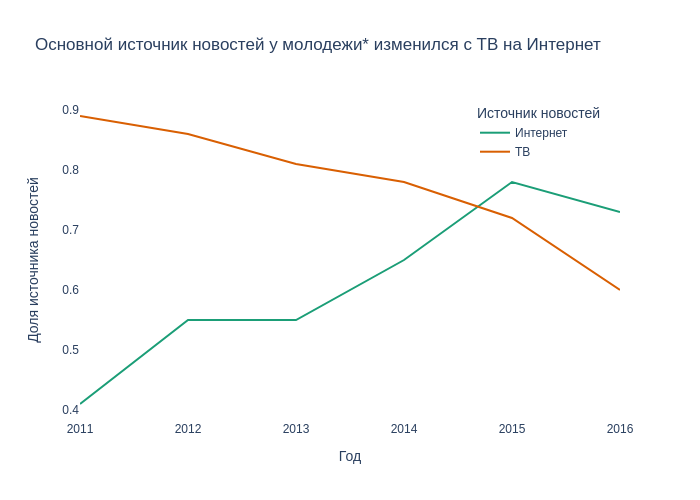

*Молодежь - возрастная группа 18-24


In [86]:
plot_age_group(get_age_group(
               df,
               age_group = "18-24"), 
               title =  'Основной источник новостей у молодежи* изменился с ТВ на Интернет',
               y_legend = 1, x_legend = 0.85)

print('*Молодежь - возрастная группа 18-24')

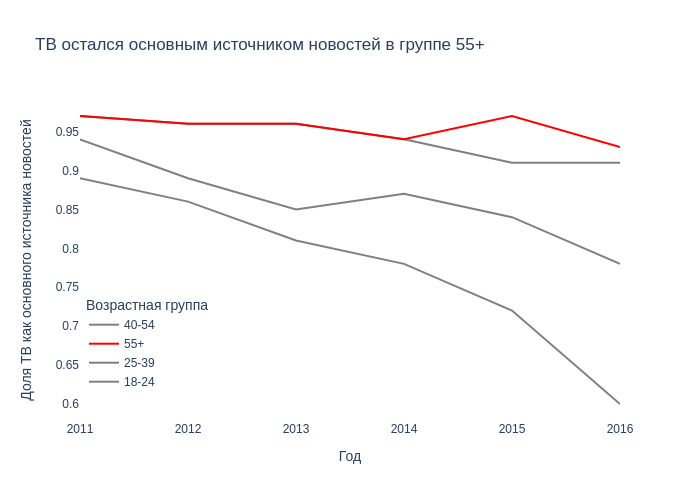

In [84]:
tv_df = df[['Год', 'age_group', 'ТВ']].sort_values(by = ['Год', 'ТВ'], ascending=[True, False])
tv_df = tv_df.rename(columns = {'ТВ': 'Доля ТВ как основного источника новостей',
                                'age_group': 'Возрастная группа'})

fig = px.line(tv_df, x="Год", y="Доля ТВ как основного источника новостей", color="Возрастная группа", 
              line_group="Возрастная группа", hover_name="Возрастная группа",
        render_mode="png", 
        color_discrete_sequence = ['grey', 'red', 'grey', 'grey'], 
        title = 'ТВ остался основным источником новостей в группе 55+')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.4,
    xanchor="center",
    x=0.125
))

fig.show('png')
